In [1]:
# image recog. project
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()     #dataset 
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
# y_train[:5]
# y_train = y_train.reshape(-1)
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [4]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes[1]

'automobile'

In [19]:
def plot_pred(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

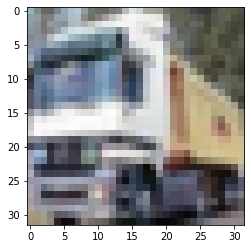

In [20]:
plot_pred(x_train, y_train, 1)


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# ann = models.Sequential([
#     layers.Flatten(input_shape=(32,32,3)),
#     layers.Dense(3000, activation='relu'),
#     layers.Dense(1000, activation='relu'),
#     layers.Dense(10, activation='sigmoid')
# ])

# ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ann.fit(x_train, y_train, epochs=5)

In [8]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4891 - accuracy: 0.4697
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2042 - accuracy: 0.5786
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0970 - accuracy: 0.6203
Epoch 4/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0127 - accuracy: 0.6482
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9565 - accuracy: 0.6684
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9081 - accuracy: 0.6848
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8617 - accuracy: 0.7007
Epoch 8/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8205 - accuracy: 0.7158
Epoch 9/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7850 - accuracy: 0.7262
Epoch 10/15
1563/1563 [==============================] - 19s 12m

In [9]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2123 - accuracy: 0.6356


[1.2123037576675415, 0.6355999708175659]

In [10]:
y_test = y_test.reshape(-1)

In [11]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [12]:
y_classes = [np.argmax(element) for element in y_pred]

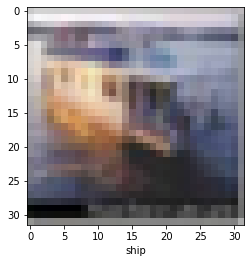

In [21]:
plot_pred(x_test, y_test, 6000)

In [14]:
classes[y_classes[6000]]

'cat'

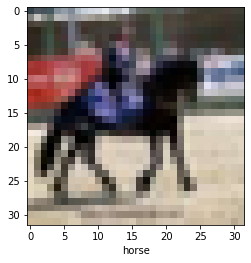

In [22]:
plot_pred(x_test, y_test, 5000)

In [16]:
classes[y_classes[5000]]

'horse'

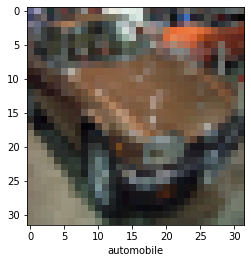

In [23]:
plot_pred(x_test, y_test, 2000)

In [ ]:
classes[y_classes[2000]]

'automobile'